In [5]:
from numpy.random import rand
from random import seed
from numpy import matmul
from time import time
from numpy.linalg import solve, norm
from numpy import matmul
import matplotlib.pyplot as plt
from math import log10
%matplotlib inline

In [2]:
def solve_and_measure(n):
    A = rand(n, n)
    x = rand(n, 1)
    b = matmul(A, x)
    start_time = time()
    x_hat = solve(A, b)
    solve_time = time()-start_time
    x_norm = norm(x, 2)
    relative_error = norm(x-x_hat, 2)/x_norm
    residual_norm = norm(b-matmul(A, x_hat), 2)/norm(b, 2)
    return [solve_time, x_norm, relative_error, residual_norm]
n = [100, 200, 500, 800, 1000, 2000, 5000, 8000, 10000, 15000, 20000]
results = {"n":[], "solve_time":[], "x_norm":[], "relative_error":[], "residual_norm":[]}
for i in n:
    a = solve_and_measure(i)
    results["n"].append(i)
    results["solve_time"].append(a[0])
    results["x_norm"].append(a[1])
    results["relative_error"].append(a[2])
    results["residual_norm"].append(a[3])

Text(0, 0.5, 'Time')

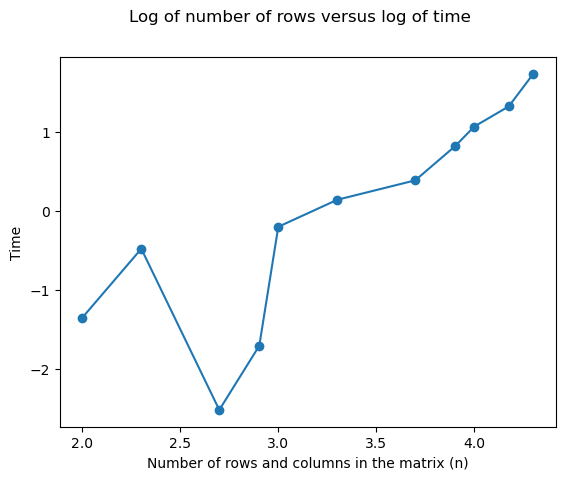

In [6]:
fig, ax = plt.subplots()
a = results["solve_time"]
log_n = []
log_a = []
for i in range(len(n)):
    log_n.append(log10(n[i]))
    log_a.append(log10(a[i]))
ax.plot(log_n, log_a, 'o-')
fig.suptitle('Log of number of rows versus log of time')
ax.set_xlabel("Number of rows and columns in the matrix (n)")
ax.set_ylabel("Time")

From this graph it can be seen that after the number of rows and columns passes 500 it can be seen that the amount of time it takes to compute x_hat actually increases. I can also see that the amount of time it takes to compute x_hat for a matrix that is of size 200x200 is more than the amount of time it takes for both the 100x100 and the 500x500